In [1]:
import pandas as pd

df = pd.read_excel("PCA db.xlsx", sheet_name="winter")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   PSSRa    428 non-null    float64
 2   PSSRb    428 non-null    float64
 3   RARSc    428 non-null    float64
 4   PSSRc    428 non-null    float64
 5   CARI     428 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.2+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.543619,5.620592,5.304991,5.334307,1.546201
std,1.628837,1.258628,1.131066,1.150535,0.353665
min,3.620865,3.185210,3.038123,3.019753,0.736208
25%,5.392493,4.747126,4.540540,4.555959,1.296024
50%,6.157062,5.470272,5.153627,5.168651,1.513292
75%,7.395219,6.387661,5.971130,6.062102,1.757582
max,12.239014,10.427906,9.524077,9.581117,2.758396


Free attempt - 5 indices - straightforward

Accuracy: 0.4186046511627907


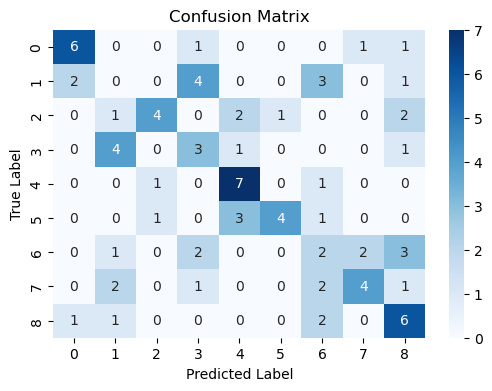

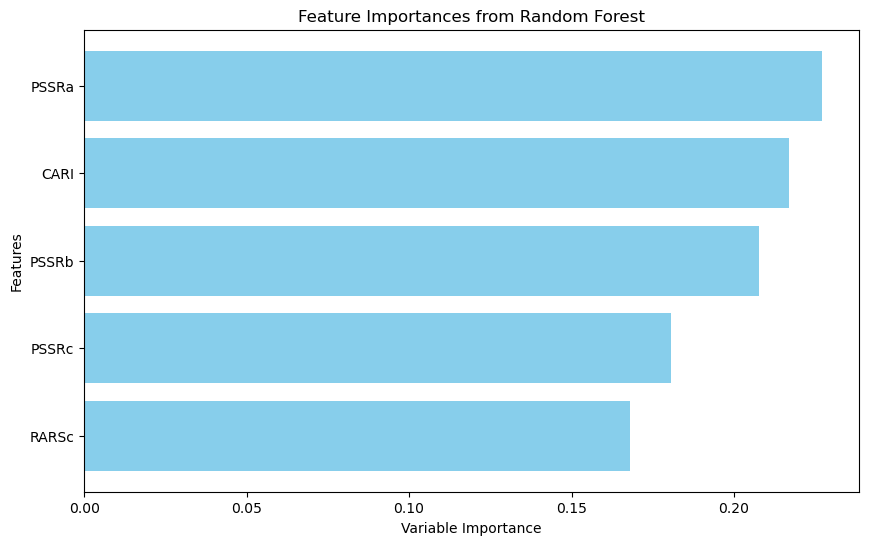

,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,66.666667,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111,11.111111
Barley,20.000000,0.000000,0.000000,40.000000,0.000000,0.000000,30.000000,0.000000,10.000000
ECHCG,0.000000,10.000000,40.000000,0.000000,20.000000,10.000000,0.000000,0.000000,20.000000
Oat,0.000000,44.444444,0.000000,33.333333,11.111111,0.000000,0.000000,0.000000,11.111111
PAPRO,0.000000,0.000000,11.111111,0.000000,77.777778,0.000000,11.111111,0.000000,0.000000
POLAV,0.000000,0.000000,11.111111,0.000000,33.333333,44.444444,11.111111,0.000000,0.000000
Wheat D,0.000000,10.000000,0.000000,20.000000,0.000000,0.000000,20.000000,20.000000,30.000000
Wheat I,0.000000,20.000000,0.000000,10.000000,0.000000,0.000000,20.000000,40.000000,10.000000
Wheat S,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,60.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]


# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)



# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.8604651162790697


,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,88.888889,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.111111
Barley,0.000000,100.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ECHCG,0.000000,0.0,87.500000,0.0,12.500000,0.000000,0.000000,0.000000,0.000000
Oat,0.000000,0.0,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000
PAPRO,0.000000,0.0,36.363636,0.0,63.636364,0.000000,0.000000,0.000000,0.000000
POLAV,0.000000,25.0,0.000000,0.0,0.000000,62.500000,0.000000,0.000000,12.500000
Wheat D,0.000000,0.0,0.000000,0.0,5.555556,5.555556,88.888889,0.000000,0.000000
Wheat I,0.000000,0.0,0.000000,0.0,11.111111,0.000000,0.000000,88.888889,0.000000
Wheat S,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,100.000000


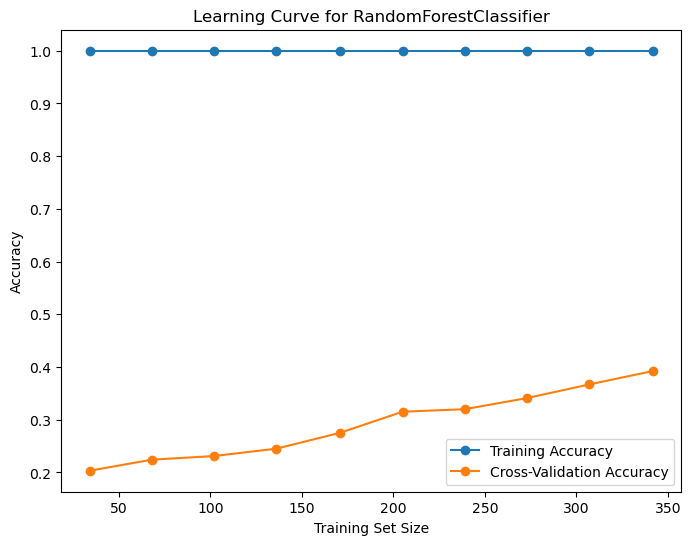

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()


Is grid search even necessary if the result is no good?

Define the terms for 3 step classification

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    crop         239
           weed          96
dicot      weed          93
Name: count, dtype: int64


Level 1: Monocot vs Dicot 

In [10]:
# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target
# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)


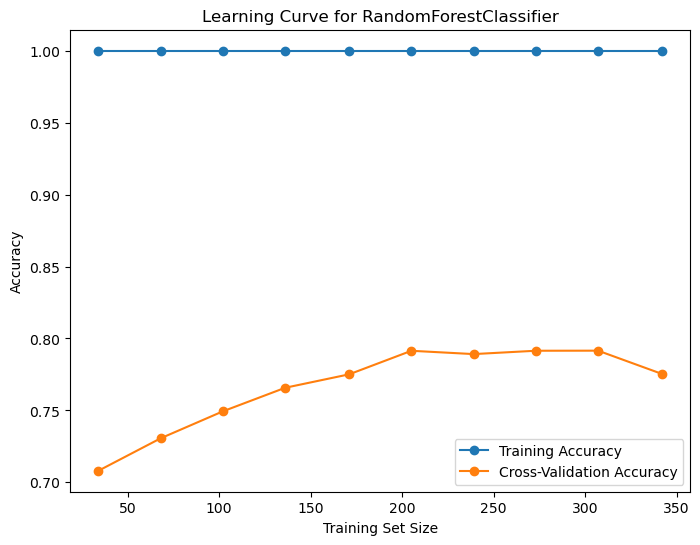

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    clf_cat1, X, y_cat1, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()

In [12]:
#gridsearch level 1
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat1,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cat1, y_train_cat1)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat1)

In [16]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score: 0.8713981244671782


In [18]:
from sklearn.metrics import classification_report
clf_cat1 = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=2,
                                  min_samples_split=10,
                                  n_estimators=200, bootstrap=False)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
# Generate and print the classification report
report = classification_report(y_test_cat1, y_pred_cat1)
print(report)

              precision    recall  f1-score   support

       dicot       0.67      0.63      0.65        19
     monocot       0.90      0.91      0.90        67

    accuracy                           0.85        86
   macro avg       0.78      0.77      0.78        86
weighted avg       0.85      0.85      0.85        86



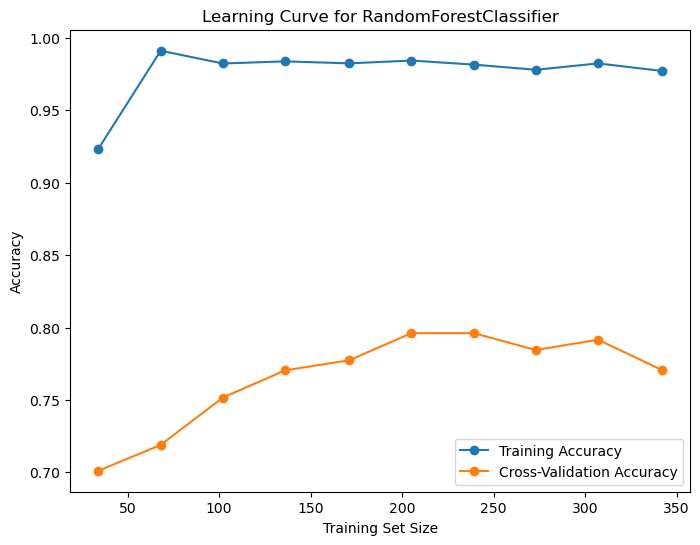

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    clf_cat1, X, y_cat1, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
cm = confusion_matrix(y_test_cat1, y_pred_cat1)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_cat1)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


,dicot,monocot
dicot,63.157895,36.842105
monocot,8.955224,91.044776


In [22]:
# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']


In [24]:
# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

In [27]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_monocot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_mono, y_train_mono)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_monocot)

In [29]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8621942697414398


In [26]:
clf_cat2_monocot = RandomForestClassifier(random_state=42, 
                                  max_depth=20,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200,bootstrap=False)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
# Generate and print the classification report
report = classification_report(y_test_monocot, y_pred_cat2_monocot)
print(report)

              precision    recall  f1-score   support

        crop       0.96      1.00      0.98        46
        weed       1.00      0.91      0.95        22

    accuracy                           0.97        68
   macro avg       0.98      0.95      0.97        68
weighted avg       0.97      0.97      0.97        68



In [28]:
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
cm = confusion_matrix(y_test_monocot, y_pred_cat2_monocot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_monocot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,100.000000,0.000000
weed,9.090909,90.909091


In [30]:
# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)
 
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)


In [79]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_dicot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_di, y_train_di)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_dicot)

In [39]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0


In [32]:
clf_cat2_dicot = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100, bootstrap=True)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
# Generate and print the classification report
report = classification_report(y_test_dicot, y_pred_cat2_dicot, zero_division=0)
print(report)

              precision    recall  f1-score   support

        crop       0.00      0.00      0.00         4
        weed       0.78      1.00      0.88        14

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



In [75]:
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
cm = confusion_matrix(y_test_dicot, y_pred_cat2_dicot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_dicot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,0.0,100.0
weed,0.0,100.0


In [35]:
# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
###dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
###X_dicot_crop = X[dicot_crop_mask]
###y_dicot_crop = df['species'][dicot_crop_mask]

###clf_dicot_crop = RandomForestClassifier(random_state=42)
###clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# ------------------------------
# Monocot-Weed model
# ------------------------------

mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_mono_weed = RandomForestClassifier(random_state=42)
grid_mono_weed = GridSearchCV(rf_mono_weed, param_grid=param_grid,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_weed.fit(X_mono_weed, y_mono_weed)
clf_mono_weed = grid_mono_weed.best_estimator_
print("Monocot-Weed best parameters:", grid_mono_weed.best_params_)

Monocot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [46]:
print("Monocot-Weed best parameters:", grid_mono_weed.best_params_)

Monocot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [37]:
clf_mono_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=5,
                                  n_estimators=500,bootstrap=True)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)

In [54]:
# ------------------------------
# Monocot-Crop model
# ------------------------------
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

param_grid_mono_crop = {
 'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_mono_crop = RandomForestClassifier(random_state=42)
grid_mono_crop = GridSearchCV(rf_mono_crop, param_grid=param_grid_mono_crop,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_crop.fit(X_mono_crop, y_mono_crop)
clf_mono_crop = grid_mono_crop.best_estimator_
print("Monocot-Crop best parameters:", grid_mono_crop.best_params_)

Monocot-Crop best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
clf_mono_crop = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200,bootstrap=True)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

RandomForestClassifier(n_estimators=200, random_state=42)

In [58]:
# ------------------------------
# Dicot-Weed model
# ------------------------------
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

param_grid_dicot_weed = {
 'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_dicot_weed = RandomForestClassifier(random_state=42)
grid_dicot_weed = GridSearchCV(rf_dicot_weed, param_grid=param_grid_dicot_weed,
                               cv=skf, scoring='accuracy', n_jobs=-1)
grid_dicot_weed.fit(X_dicot_weed, y_dicot_weed)
clf_dicot_weed = grid_dicot_weed.best_estimator_
print("Dicot-Weed best parameters:", grid_dicot_weed.best_params_)

Dicot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [41]:
clf_dicot_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=500, bootstrap=True)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

RandomForestClassifier(n_estimators=500, random_state=42)

In [43]:
final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

In [45]:
# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


Final Species-Level Accuracy: 0.8255813953488372


,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,77.777778,11.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.111111
Barley,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ECHCG,0.000000,0.000000,75.000000,0.0,12.500000,12.500000,0.000000,0.000000,0.000000
Oat,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000
PAPRO,0.000000,0.000000,36.363636,0.0,63.636364,0.000000,0.000000,0.000000,0.000000
POLAV,0.000000,25.000000,0.000000,0.0,0.000000,62.500000,0.000000,0.000000,12.500000
Wheat D,0.000000,0.000000,0.000000,0.0,5.555556,5.555556,88.888889,0.000000,0.000000
Wheat I,0.000000,0.000000,0.000000,0.0,11.111111,11.111111,0.000000,77.777778,0.000000
Wheat S,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,100.000000
